### Impoart Libraries 

In [1]:
import pandas as pd
import numpy as np 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import warnings

warnings.filterwarnings("ignore")

%matplotlib inline

In [2]:
df = pd.read_csv ("NHANES_age_prediction.csv")

In [3]:
df.head()

,SEQN,age_group,RIDAGEYR,RIAGENDR,PAQ605,BMXBMI,LBXGLU,DIQ010,LBXGLT,LBXIN
0,73564.0,Adult,61.0,2.0,2.0,35.7,110.0,2.0,150.0,14.91
1,73568.0,Adult,26.0,2.0,2.0,20.3,89.0,2.0,80.0,3.85
2,73576.0,Adult,16.0,1.0,2.0,23.2,89.0,2.0,68.0,6.14
3,73577.0,Adult,32.0,1.0,2.0,28.9,104.0,2.0,84.0,16.15
4,73580.0,Adult,38.0,2.0,1.0,35.9,103.0,2.0,81.0,10.92


In [4]:
df.tail()

,SEQN,age_group,RIDAGEYR,RIAGENDR,PAQ605,BMXBMI,LBXGLU,DIQ010,LBXGLT,LBXIN
2273,83711.0,Adult,38.0,2.0,2.0,33.5,100.0,2.0,73.0,6.53
2274,83712.0,Adult,61.0,1.0,2.0,30.0,93.0,2.0,208.0,13.02
2275,83713.0,Adult,34.0,1.0,2.0,23.7,103.0,2.0,124.0,21.41
2276,83718.0,Adult,60.0,2.0,2.0,27.4,90.0,2.0,108.0,4.99
2277,83727.0,Adult,26.0,1.0,2.0,24.5,108.0,2.0,108.0,3.76


In [5]:
 df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2278 entries, 0 to 2277
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   SEQN       2278 non-null   float64
 1   age_group  2278 non-null   object 
 2   RIDAGEYR   2278 non-null   float64
 3   RIAGENDR   2278 non-null   float64
 4   PAQ605     2278 non-null   float64
 5   BMXBMI     2278 non-null   float64
 6   LBXGLU     2278 non-null   float64
 7   DIQ010     2278 non-null   float64
 8   LBXGLT     2278 non-null   float64
 9   LBXIN      2278 non-null   float64
dtypes: float64(9), object(1)
memory usage: 178.1+ KB


In [6]:
df.describe()

,SEQN,RIDAGEYR,RIAGENDR,PAQ605,BMXBMI,LBXGLU,DIQ010,LBXGLT,LBXIN
count,2278.000000,2278.000000,2278.000000,2278.000000,2278.000000,2278.000000,2278.000000,2278.000000,2278.000000
mean,78691.853819,41.795874,1.511414,1.822651,27.955180,99.553117,2.016242,114.978929,11.834794
std,2921.365151,20.156111,0.499979,0.398918,7.248962,17.889834,0.185556,47.061239,9.718812
min,73564.000000,12.000000,1.000000,1.000000,14.500000,63.000000,1.000000,40.000000,0.140000
25%,76171.750000,24.000000,1.000000,2.000000,22.800000,91.000000,2.000000,87.000000,5.860000
50%,78749.000000,41.000000,2.000000,2.000000,26.800000,97.000000,2.000000,105.000000,9.040000
75%,81213.500000,58.000000,2.000000,2.000000,31.200000,104.000000,2.000000,130.000000,14.440000
max,83727.000000,80.000000,2.000000,7.000000,70.100000,405.000000,3.000000,604.000000,102.290000


In [7]:
df['SEQN'].unique()

array([73564., 73568., 73576., ..., 83713., 83718., 83727.])

In [8]:
df['age_group'].unique()

array(['Adult', 'Senior'], dtype=object)

In [9]:
df.isnull().sum()

SEQN         0
age_group    0
RIDAGEYR     0
RIAGENDR     0
PAQ605       0
BMXBMI       0
LBXGLU       0
DIQ010       0
LBXGLT       0
LBXIN        0
dtype: int64

In [10]:
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
2273    False
2274    False
2275    False
2276    False
2277    False
Length: 2278, dtype: bool

In [21]:
#Drop the Id columns 
df_new = df.drop(columns=('SEQN'), index=1)
df_new.head()

,age_group,RIDAGEYR,RIAGENDR,PAQ605,BMXBMI,LBXGLU,DIQ010,LBXGLT,LBXIN
0,1,61.0,2.0,2.0,35.7,110.0,2.0,150.0,14.91
2,1,16.0,1.0,2.0,23.2,89.0,2.0,68.0,6.14
3,1,32.0,1.0,2.0,28.9,104.0,2.0,84.0,16.15
4,1,38.0,2.0,1.0,35.9,103.0,2.0,81.0,10.92
5,1,50.0,1.0,2.0,23.6,110.0,2.0,100.0,6.08


In [22]:
#pip install missingno

In [23]:
import missingno as msno

<Axes: >

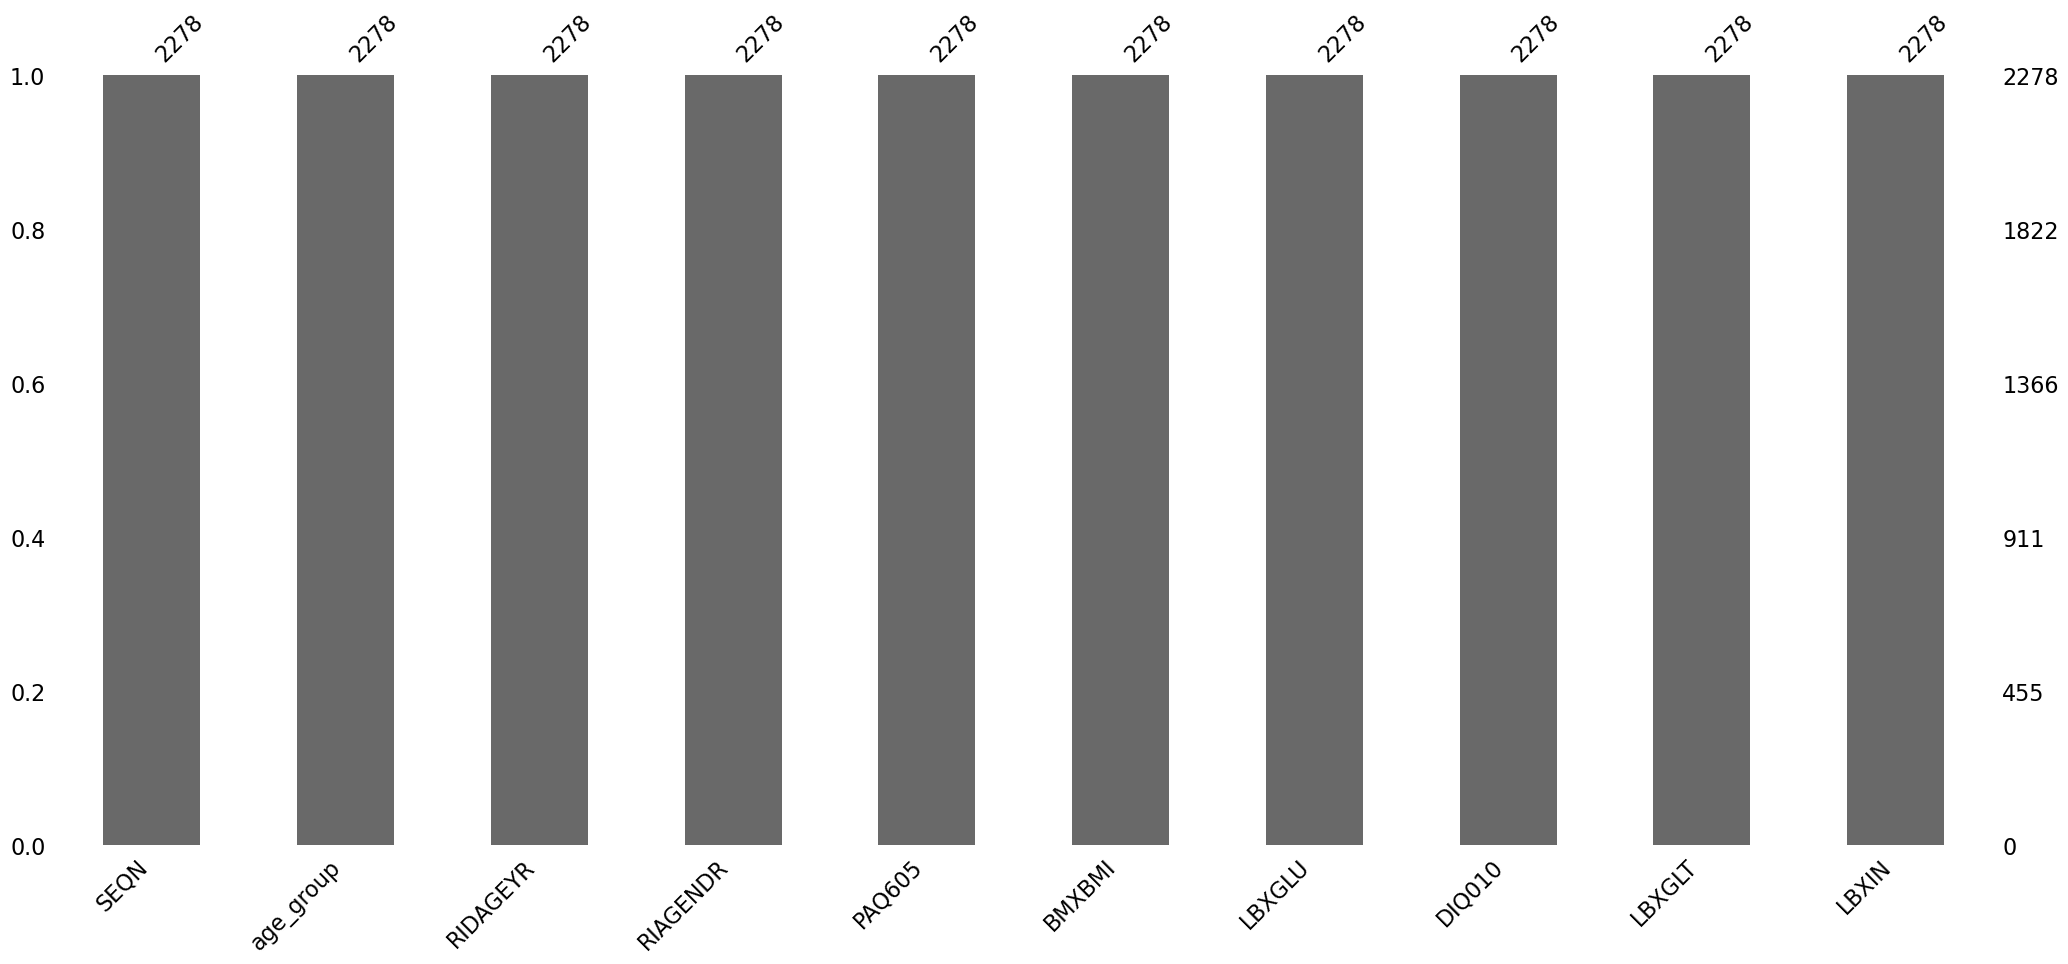

In [24]:
msno.bar(df)

<Axes: >

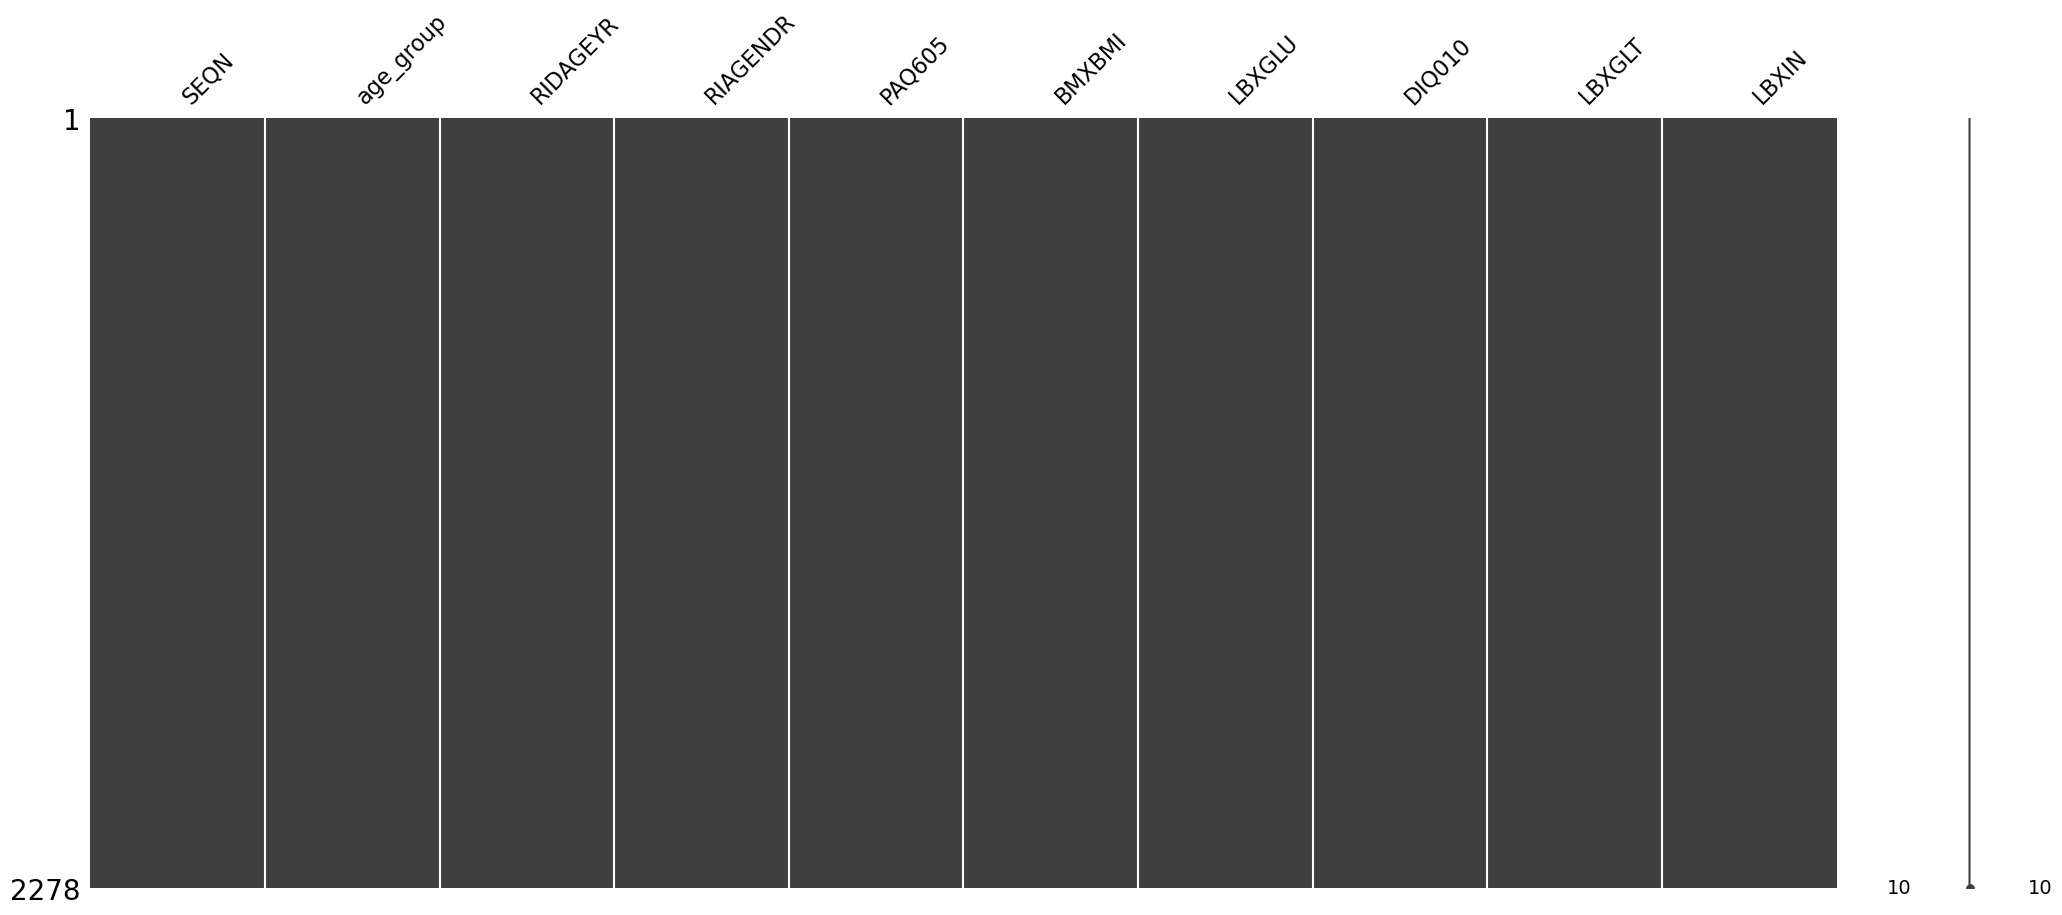

In [25]:
msno.matrix(df)

In [27]:
df_new.shape

(2277, 9)

In [28]:
df_new["age_group"].unique()
df_new["age_group"].value_counts()

age_group
1    1913
2     364
Name: count, dtype: int64

In [30]:
df_new.columns

Index(['age_group', 'RIDAGEYR', 'RIAGENDR', 'PAQ605', 'BMXBMI', 'LBXGLU',
       'DIQ010', 'LBXGLT', 'LBXIN'],
      dtype='object')

In [31]:
from sklearn.preprocessing import LabelEncoder 
le = LabelEncoder()

df_new.age_group = le.fit_transform(df_new.age_group)
df_new.RIAGENDR= le.fit_transform(df_new.RIAGENDR)
df_new.PAQ605 = le.fit_transform(df_new.PAQ605)
df_new.DIQ010 = le.fit_transform(df_new.DIQ010)

In [32]:
df_new.head()

,age_group,RIDAGEYR,RIAGENDR,PAQ605,BMXBMI,LBXGLU,DIQ010,LBXGLT,LBXIN
0,0,61.0,1,1,35.7,110.0,1,150.0,14.91
2,0,16.0,0,1,23.2,89.0,1,68.0,6.14
3,0,32.0,0,1,28.9,104.0,1,84.0,16.15
4,0,38.0,1,0,35.9,103.0,1,81.0,10.92
5,0,50.0,0,1,23.6,110.0,1,100.0,6.08


In [33]:
df_new['DIQ010'].unique()

array([1, 0, 2], dtype=int64)

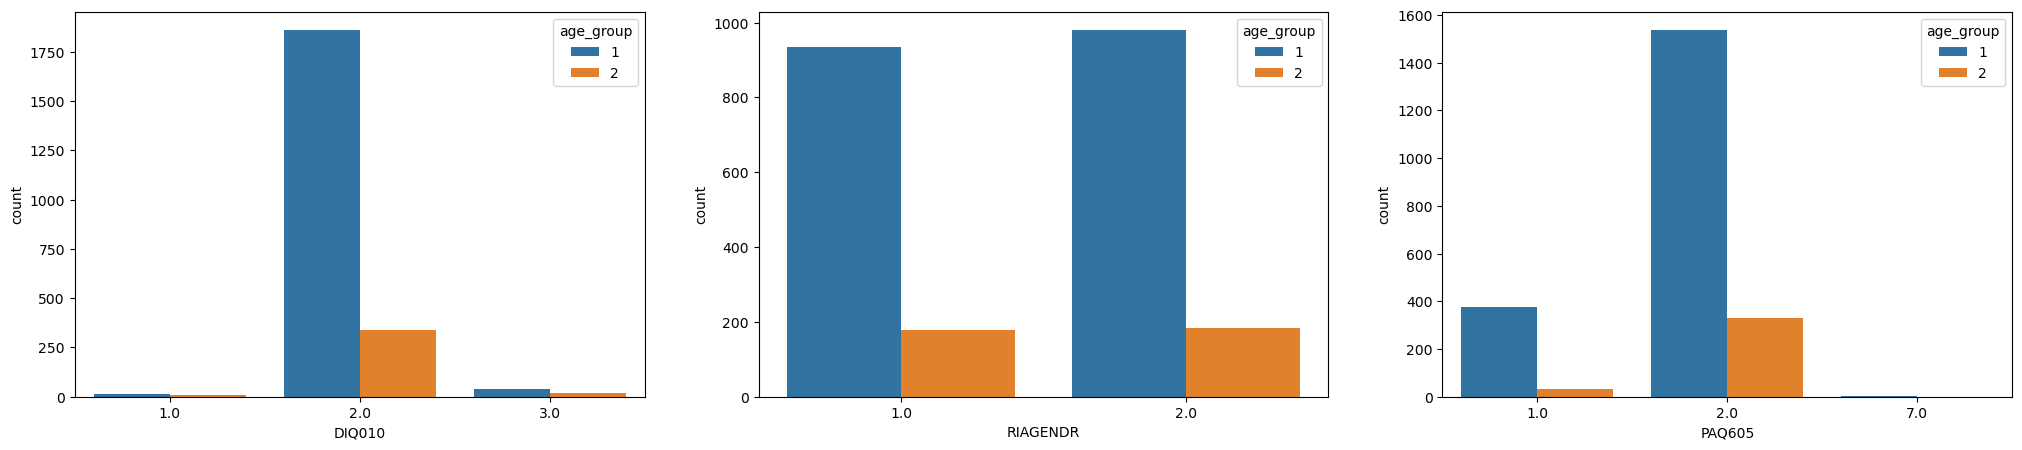

In [19]:
fig, ax = plt.subplots(1,3,figsize=(25,5))
for i, col in enumerate(["DIQ010","RIAGENDR","PAQ605"]):
  sns.countplot(data=df,
                x=col,
                hue='age_group',
                ax=ax[i])

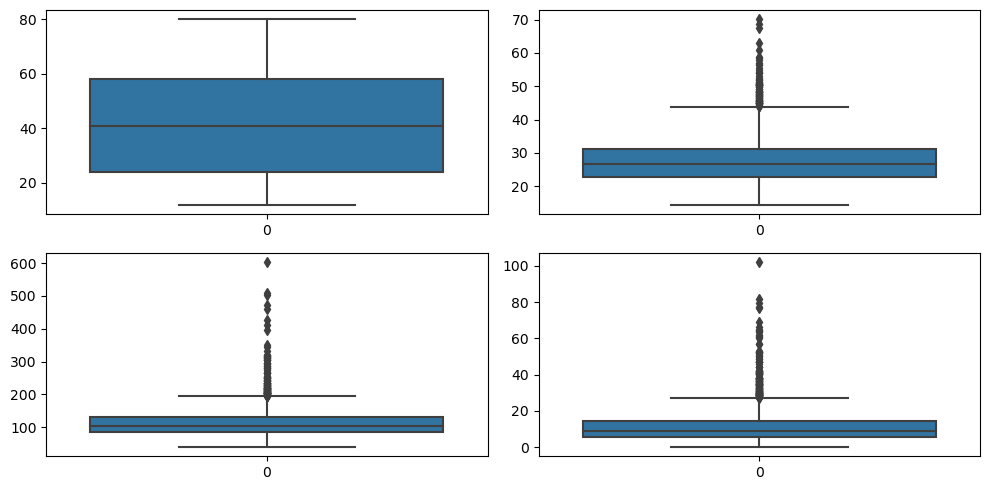

In [20]:
# Outlier Analysis
fig, axs = plt.subplots(2,2, figsize = (10,5))
plt1 = sns.boxplot(df['RIDAGEYR'], ax = axs[0,0])
plt2 = sns.boxplot(df['BMXBMI'], ax = axs[0,1])
plt3 = sns.boxplot(df['LBXGLT'], ax = axs[1,0])
plt4 = sns.boxplot(df['LBXIN'], ax = axs[1,1])

plt.tight_layout()

In [34]:
# Capital X because there are more than one feature 
  # y - lower case = because it's only one feature. 
    
X = df_new.drop(columns=["DIQ010"])
y = df_new['DIQ010']

X.shape, y.shape

((2277, 8), (2277,))

In [35]:
class_feature_means = pd.DataFrame(columns=df_new["DIQ010"])
for c, rows in df_new.groupby('DIQ010'):
    class_feature_means[c] = rows.mean()
class_feature_means

DIQ010,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
age_group,0.153776,0.153776,0.153776,0.153776,0.153776,0.153776,0.153776,0.153776,0.153776,0.153776,...,0.153776,0.153776,0.153776,0.153776,0.153776,0.153776,0.153776,0.153776,0.153776,0.153776
RIDAGEYR,41.262511,41.262511,41.262511,41.262511,41.262511,41.262511,41.262511,41.262511,41.262511,41.262511,...,41.262511,41.262511,41.262511,41.262511,41.262511,41.262511,41.262511,41.262511,41.262511,41.262511
RIAGENDR,0.512284,0.512284,0.512284,0.512284,0.512284,0.512284,0.512284,0.512284,0.512284,0.512284,...,0.512284,0.512284,0.512284,0.512284,0.512284,0.512284,0.512284,0.512284,0.512284,0.512284
PAQ605,0.823021,0.823021,0.823021,0.823021,0.823021,0.823021,0.823021,0.823021,0.823021,0.823021,...,0.823021,0.823021,0.823021,0.823021,0.823021,0.823021,0.823021,0.823021,0.823021,0.823021
BMXBMI,27.833803,27.833803,27.833803,27.833803,27.833803,27.833803,27.833803,27.833803,27.833803,27.833803,...,27.833803,27.833803,27.833803,27.833803,27.833803,27.833803,27.833803,27.833803,27.833803,27.833803
LBXGLU,98.631028,98.631028,98.631028,98.631028,98.631028,98.631028,98.631028,98.631028,98.631028,98.631028,...,98.631028,98.631028,98.631028,98.631028,98.631028,98.631028,98.631028,98.631028,98.631028,98.631028
DIQ010,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
LBXGLT,112.627389,112.627389,112.627389,112.627389,112.627389,112.627389,112.627389,112.627389,112.627389,112.627389,...,112.627389,112.627389,112.627389,112.627389,112.627389,112.627389,112.627389,112.627389,112.627389,112.627389
LBXIN,11.668321,11.668321,11.668321,11.668321,11.668321,11.668321,11.668321,11.668321,11.668321,11.668321,...,11.668321,11.668321,11.668321,11.668321,11.668321,11.668321,11.668321,11.668321,11.668321,11.668321
